In [1]:
#from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
urbn_soup = BeautifulSoup(open(r"C:\Users\User\Desktop\thesis_17_3_2022\stock_price_and_news\stock_news\dataset\urbn_final\urbn_2003.html", encoding="utf8"))


In [3]:
urbn_timestamp = []
for e in urbn_soup.find_all("span", {"class": "article__timestamp"}):
    urbn_timestamp.append(e.get_text())
urbn_file = []
for gps_text in urbn_soup.find_all("h3"):
    urbn_file.append(gps_text.get_text())
urbn_clean1 = []
for gps_text1 in urbn_file:
    urbn_clean1.append(gps_text1.replace("\n", ""))
urbn_remove = []
for e in urbn_clean1:
    if e not in (
 'No Recent Tickers',
 'Overview'
 ):
        urbn_remove.append(e)
urbn_space = []
for e in urbn_remove:
    urbn_space.append(e.strip())
urbn_fullstop = []
for e in urbn_space:
    urbn_fullstop.append(e.replace(".",""))
urbn_q = []
for e in urbn_fullstop:
    urbn_q.append(e.replace("?",""))
urbn_colon = []
for e in urbn_q:
    urbn_colon.append(e.replace(":",""))
urbn_comma = []
for e in urbn_colon:
    urbn_comma.append(e.replace(",",""))
urbn_percent = []
for e in urbn_comma:
    urbn_percent.append(e.replace("%","percent"))
urbn_lower = []
for i in range(len(urbn_percent)):
    urbn_lower.append(urbn_percent[i].lower())
urbn_barr = []
for e in urbn_lower:
    urbn_barr.append(e.replace("barron's",""))
urbn_pain = []
for e in urbn_barr:
    if e not in ( 'marketwatch',
 'company',
 'dow jones network'):
        urbn_pain.append(e)


In [4]:
urbn_et = []
for e in urbn_timestamp:
    urbn_et.append(e.replace("ET",""))
urbn_at1 = []
for e in urbn_et:
    urbn_at1.append(e.replace("at",""))
urbn_pm1 = []
for e in urbn_at1:
    urbn_pm1.append(e.replace("p.m.",""))
urbn_am1 = []
for e in urbn_pm1:
    urbn_am1.append(e.replace("a.m.",""))
urbn_commas = []
for e in urbn_am1:
    urbn_commas.append(e.replace(",",""))
urbn_fullstops = []
for e in urbn_commas:
    urbn_fullstops.append(e.replace(".",""))
urbn_timestamp_final = urbn_fullstops


In [5]:
urbn_timestamp_final[-5:]

['Feb 22 2022  1:46  ',
 'Feb 18 2022  7:38  ',
 'Feb 15 2022  10:38  ',
 'Feb 13 2022  9:55  ',
 'Feb 11 2022  3:38  ']

In [6]:
urbn_date = [datetime.strptime(x,'%b %d %Y  %I:%M ') for x in urbn_timestamp_final]

In [7]:
tf_vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)

In [8]:
urbn_data = pd.DataFrame(
    {'Date': urbn_date,
     'text_headlines': urbn_pain
     
    })

In [9]:
urbn_data.to_csv('urbn_topic_selection.csv', index = True)

In [10]:
urbn_data.head(3)
urbn_news_matrix = tf_vectorizer.fit_transform(urbn_data['text_headlines'])

In [19]:
lda = LatentDirichletAllocation(n_components=3, learning_method='online',doc_topic_prior = 0.9,topic_word_prior= 0.01 , random_state=0, verbose=0, n_jobs = -1)

In [20]:
lda_model = lda.fit(urbn_news_matrix)
lda_matrix = lda_model.transform(urbn_news_matrix)
lda_matrix

array([[0.30879933, 0.16558642, 0.52561425],
       [0.28633153, 0.24411683, 0.46955164],
       [0.24636689, 0.59755508, 0.15607803],
       ...,
       [0.40472412, 0.43788446, 0.15739142],
       [0.1544191 , 0.50732988, 0.33825102],
       [0.18357241, 0.37189073, 0.44453686]])

In [21]:
def print_topics(model, count_vectorizer, n_top_words):
    words = tf_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
      
        print("\nTopic #%d:" % topic_idx )
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
# Print the topics found by the LDA model
#print("Topics found via LDA:")
#print_topics(lda_model, urbn_news_matrix, 15)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1312 samples in 0.001s...
[t-SNE] Computed neighbors for 1312 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1312
[t-SNE] Computed conditional probabilities for sample 1312 / 1312
[t-SNE] Mean sigma: 0.016377
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.591473
[t-SNE] KL divergence after 1000 iterations: 0.313311


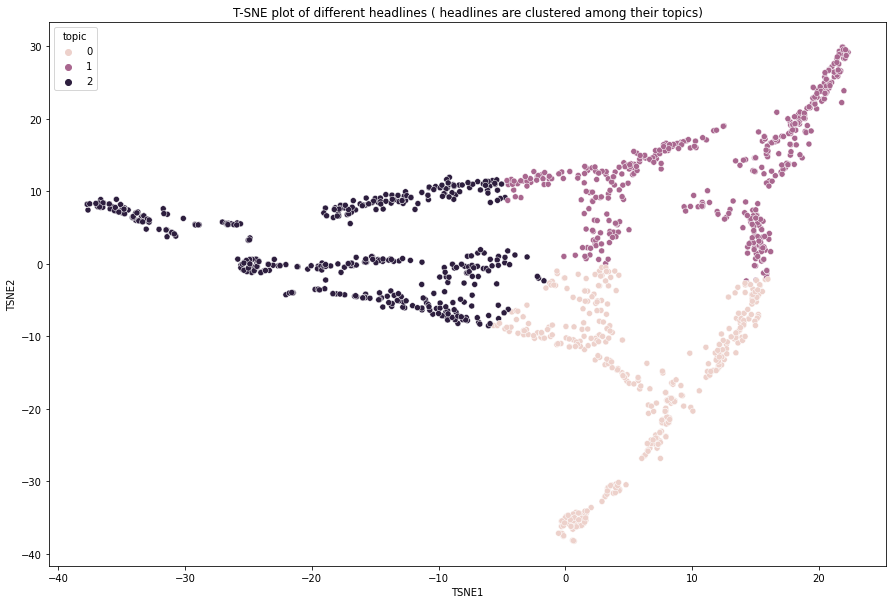

In [22]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_features = model.fit_transform(lda_matrix)
df = pd.DataFrame(tsne_features)
df['topic'] = lda_matrix.argmax(axis=1)
df.columns = ['TSNE1', 'TSNE2', 'topic']
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.title('T-SNE plot of different headlines ( headlines are clustered among their topics)')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df, legend = 'full')
plt.show()